       exam_1     exam_2
0   34.623660  78.024693
1   30.286711  43.894998
2   35.847409  72.902198
3   60.182599  86.308552
4   79.032736  75.344376
5   45.083277  56.316372
6   61.106665  96.511426
7   75.024746  46.554014
8   76.098787  87.420570
9   84.432820  43.533393
10  95.861555  38.225278
11  75.013658  30.603263
12  82.307053  76.481963
13  69.364589  97.718692
14  39.538339  76.036811
15  53.971052  89.207350
16  69.070144  52.740470
17  67.946855  46.678574
18  70.661510  92.927138
19  76.978784  47.575964
20  67.372028  42.838438
21  89.676776  65.799366
22  50.534788  48.855812
23  34.212061  44.209529
24  77.924091  68.972360
25  62.271014  69.954458
26  80.190181  44.821629
27  93.114389  38.800670
28  61.830206  50.256108
29  38.785804  64.995681
..        ...        ...
70  32.722833  43.307173
71  64.039320  78.031688
72  72.346494  96.227593
73  60.457886  73.094998
74  58.840956  75.858448
75  99.827858  72.369252
76  47.264269  88.475865
77  50.458160  75.809860


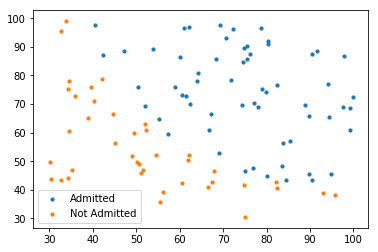

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



# load the data from the file
data = pd.read_csv("c:/users/sandeep/downloads/marks.csv")
data.head()
# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]
print(X)
# y = target values, last column of the data frame
y = data.iloc[:, -1]

# filter out the applicants that got admitted
admitted = data.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 

C:\Users\Sandeep\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1], dtype=int64)

In [6]:
X_test

,exam_1,exam_2
26,80.190181,44.821629
86,42.075455,78.844786
2,35.847409,72.902198
55,49.586677,59.808951
75,99.827858,72.369252
93,74.492692,84.845137
16,69.070144,52.740470
73,60.457886,73.094998
54,50.286496,49.804539
95,83.489163,48.380286


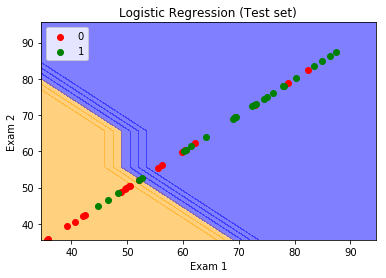

In [7]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
#print(X_set["exam_1"].min())
aranged_e1 = np.arange(start = X_set["exam_1"].min(), stop = X_set["exam_1"].max(), step = 10)
aranged_e2 = np.arange(start = X_set["exam_2"].min(), stop = X_set["exam_2"].max(), step =10)

X1, X2 = np.meshgrid(aranged_e1, aranged_e2)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('orange', 'blue')))

#print(X.loc[0])
#print(X.loc[1])
#print(X_set[y_set == 1])

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j], X_set[y_set == i], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.legend()
plt.show()